In [2]:
#βιβλιοθήκες που χρειαζόμαστε
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time
import keras
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [11]:
print("x train initial shape:", x_train.shape[0:])
print("y train initial shape:", y_train.shape[0:])
print("x test initial shape:", x_test.shape[0:])
print("y test initial shape:", y_test.shape[0:])

x train initial shape: (60000, 784)
y train initial shape: (60000,)
x test initial shape: (1000, 784)
y test initial shape: (1000,)


In [5]:
#μειώνω το μέγεθος του τεστ για λιγότερο χρόνο στους υπολογισμούς
x_train = x_train[:60000]
y_train = y_train[:60000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [6]:
#επανασχηματισμός των δεδομένων
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

In [16]:
print("x train initial shape:", x_train.shape[0:])
print("y train initial shape:", y_train.shape[0:])
print("x test initial shape:", x_test.shape[0:])
print("y test initial shape:", y_test.shape[0:])

x train initial shape: (60000, 784)
y train initial shape: (60000,)
x test initial shape: (1000, 784)
y test initial shape: (1000,)


In [12]:
pics_count = 16
digits = np.zeros((pics_count,28,28), dtype=int)
labels = np.zeros((pics_count,1), dtype=int)

def lets_knn(x_train, y_train, x_test, y_test, n_neighbors = 3, weights = 'uniform', print_wrong_pred = False):
    t0 = time.time()
    #εκπαιδεύω τον αλγόριθμο
    knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
    knn.fit(x_train, y_train)
    t1 = time.time()
    
    #υπολογίζω τις κλάσεις και τις συγκρίνω με τις πραγματικές ετικέτες
    pred = knn.predict(x_test)
    t2 = time.time()
    
    #υπολογίζω την ακρίβεια σε ποσοστά
    accuracy = round(np.mean(pred == y_test)*100, 1)

    print("Accuracy of", weights ,"KNN with", n_neighbors, "neighbors:", accuracy,"%. Fit in", round(t1 - t0, 1), "s. Prediction in", round(t2 - t1, 1), "s")
    
    #επιλέγω τις λανθασμένες προβλέψεις 
    wrong_pred = x_test[(pred != y_test)]
    correct_labels = y_test[(pred != y_test)]
    wrong_labels = pred[(pred != y_test)]
    
    if print_wrong_pred:
        # εκτυπώνω τις πρώτες 16
        fig = plt.figure()
        fig.suptitle("Incorrect predictions", fontsize=18)
        # για να εκτυπώσω διαφορετικά μεγέθη θέλω να δώ αρχικά πως θα πρέπει να είναι
        size = int(np.sqrt(x_train.shape[1]))
        for n, (digit, wrong_label, correct_label) in enumerate(zip(wrong_pred, wrong_labels, correct_labels)):
            a = fig.add_subplot(4, 4, n + 1)
            plt.imshow(digit.reshape(size,size))
            a.set_title("Correct: " + str(correct_label) + ". Predicted: " + str(wrong_label))
            a.axis('off')
            if n == 15:
                break
        fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
        plt.show()

In [19]:
#ελέγχω με διαφορετικές παραμέτρους απο 1 μέχρι 9
for weights in ['uniform', 'distance']:
    for n in range(1, 10):
        lets_knn(x_train, y_train, x_test, y_test, n_neighbors=n, weights=weights, print_wrong_pred=False)

Accuracy of uniform KNN with 1 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 21.8 s
Accuracy of uniform KNN with 2 neighbors: 94.8 %. Fit in 0.0 s. Prediction in 22.5 s
Accuracy of uniform KNN with 3 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 21.5 s
Accuracy of uniform KNN with 4 neighbors: 96.4 %. Fit in 0.0 s. Prediction in 22.4 s
Accuracy of uniform KNN with 5 neighbors: 96.1 %. Fit in 0.0 s. Prediction in 23.3 s
Accuracy of uniform KNN with 6 neighbors: 95.9 %. Fit in 0.0 s. Prediction in 28.0 s
Accuracy of uniform KNN with 7 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 25.7 s
Accuracy of uniform KNN with 8 neighbors: 95.8 %. Fit in 0.0 s. Prediction in 25.5 s
Accuracy of uniform KNN with 9 neighbors: 95.2 %. Fit in 0.0 s. Prediction in 24.7 s
Accuracy of distance KNN with 1 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 25.7 s
Accuracy of distance KNN with 2 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 32.1 s
Accuracy of distance KNN with 3 neighbors: 96.5 %. Fit in 0.0 s

Accuracy of uniform KNN with 1 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 25.7 s


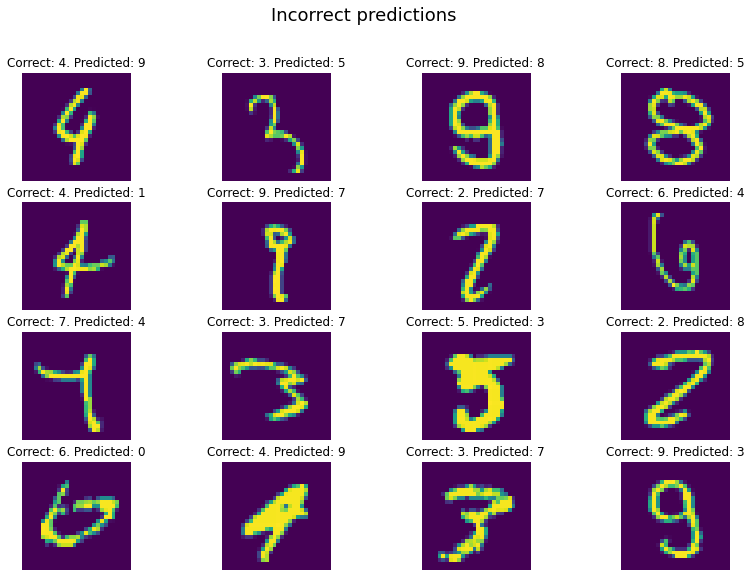

Accuracy of distance KNN with 1 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 22.6 s


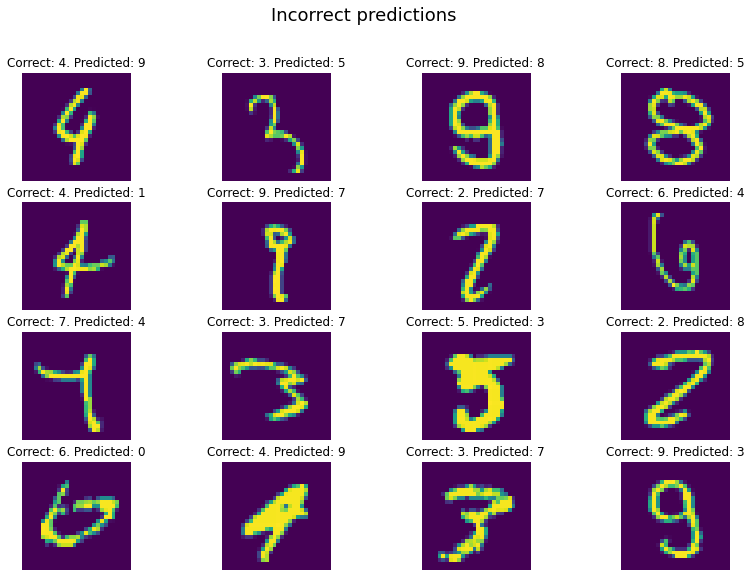

In [22]:
#Με έναν πλησίεστερο γείτονα
lets_knn(x_train, y_train, x_test, y_test, 1, 'uniform', print_wrong_pred=True)
lets_knn(x_train, y_train, x_test, y_test, 1, 'distance', print_wrong_pred=True)

Accuracy of uniform KNN with 3 neighbors: 96.2 %. Fit in 0.0 s. Prediction in 22.0 s


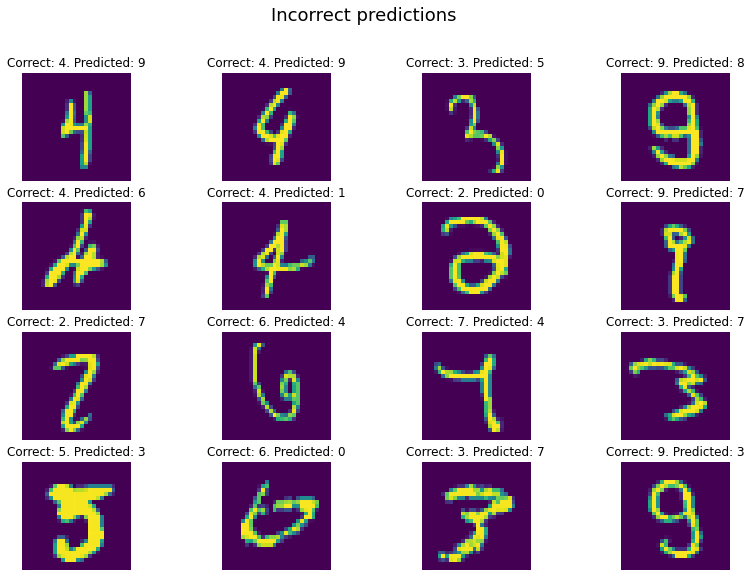

Accuracy of distance KNN with 3 neighbors: 96.5 %. Fit in 0.0 s. Prediction in 22.0 s


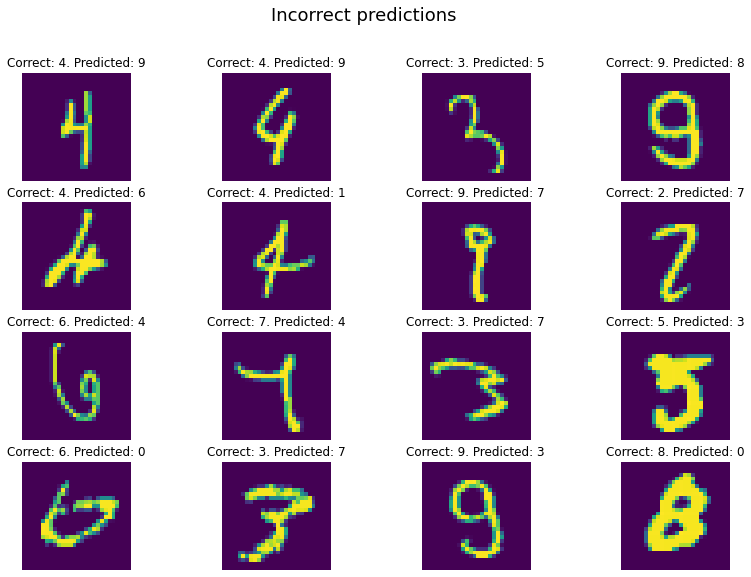

In [23]:
#Με 3 πλησιέστερους γείτονες
lets_knn(x_train, y_train, x_test, y_test, 3, 'uniform', print_wrong_pred=True)
lets_knn(x_train, y_train, x_test, y_test, 3, 'distance', print_wrong_pred=True)